# Etude des reviews

In [2]:
import re
import pandas as pd 
import string
from collections import defaultdict
from datetime import datetime

import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download('stopwords')

from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\florm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ouverture des fichiers

In [3]:
df_review = pd.read_excel('20231027_review.xlsx') 
df_review

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z
...,...,...,...,...,...,...,...,...
436,"Southern Cross Care (SA, NT & VIC) Inc.",796738,Co-workers are supportive.\nA lovely experienc...,Head office staff disrespect staff working on ...,Allied Health,"South Australia, Australia",1,2021-02-03T22:48:14.000Z
437,Department of Training and Workforce Developme...,795949,Some flexibility depending on the area you wor...,Middle managers with no experience in managing...,Human Resources Role,Osborne Park WA 6017,3,2023-05-07T01:12:04.000Z
438,Department of Training and Workforce Developme...,795949,"Casual atmosphere, good flexi, no micro manage...",A lot of mismanagement and fighting between te...,Information Technology Support Officer,"Western Australia, Australia",3,2021-03-19T03:44:51.000Z
439,Department of Training and Workforce Developme...,795949,"The colleagues, flexibility of time and intere...",Paperwork must be filed and approved for every...,Level 3 Administration,"Osborne Park WA, Australia",5,2018-02-08T07:08:30.074Z


Lemmatiser les commentaires

In [4]:
def stem_text(text):
    # ponctuation
    punct = string.punctuation
    # Mots vides
    st = set(stopwords.words('english'))
    # Racinisation
    stemmer = PorterStemmer()

    # Utilisation d'une expression régulière pour supprimer les émojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Transformation de la phrase, sans prendre en compte les stopwords, en mot.
    words = [tok.lower() for tok in word_tokenize(text) if tok not in set(st) and tok not in string.punctuation]
    # Racinnation des mots 
    racine = [stemmer.stem(mot) for mot in words]
    return ' '.join(racine)


def lemmatise_text(text):
    # ponctuation
    punct = string.punctuation
    # Mots vides
    st = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Utilisation d'une expression régulière pour supprimer les émojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Transformation de la phrase, sans prendre en compte les stopwords, en mot.
    words = [tok.lower() for tok in word_tokenize(text) if tok not in set(st) and tok not in string.punctuation]
    # Racinnation des mots 
    lem = [lemmatizer.lemmatize(mot) for mot in words]

    return ' '.join(lem)


df_review['lemmas_avantage'] = df_review['avantage'].apply(lemmatise_text)
df_review['lemmas_inconvenient'] = df_review['inconvenient'].apply(lemmatise_text)
df_review['stem_avantage'] = df_review['avantage'].apply(stem_text)
df_review['stem_inconvenient'] = df_review['inconvenient'].apply(stem_text)
df_review

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date,lemmas_avantage,lemmas_inconvenient,stem_avantage,stem_inconvenient
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z,the culture standout the people incredibly mem...,the challenge lie ever-increasing regulatory l...,the cultur standout the peopl incred member fo...,the challeng lie ever-increas regulatori lands...
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z,the best part police credit union people absol...,there n't many challenge difficulty always peo...,the best part polic credit union peopl absolut...,there n't mani challeng difficulti alway peopl...
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z,management really care staff the culture great...,no challenge,manag realli care staff the cultur great every...,no challeng
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z,fantastic onboarding experience i felt welcome...,i n't faced,fantast onboard experi i felt welcom everyon d...,i n't face
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z,fantastic work culture supportive management t...,sale target challenge time,fantast work cultur support manag the opportun...,sale target challeng time
...,...,...,...,...,...,...,...,...,...,...,...,...
436,"Southern Cross Care (SA, NT & VIC) Inc.",796738,Co-workers are supportive.\nA lovely experienc...,Head office staff disrespect staff working on ...,Allied Health,"South Australia, Australia",1,2021-02-03T22:48:14.000Z,co-worker supportive a lovely experience suppo...,head office staff disrespect staff working gro...,co-work support a love experi support resid,head offic staff disrespect staff work ground ...
437,Department of Training and Workforce Developme...,795949,Some flexibility depending on the area you wor...,Middle managers with no experience in managing...,Human Resources Role,Osborne Park WA 6017,3,2023-05-07T01:12:04.000Z,some flexibility depending area work,middle manager experience managing team little...,some flexibl depend area work,middl manag experi manag team littl aptitud ma...
438,Department of Training and Workforce Developme...,795949,"Casual atmosphere, good flexi, no micro manage...",A lot of mismanagement and fighting between te...,Information Technology Support Officer,"Western Australia, Australia",3,2021-03-19T03:44:51.000Z,casual atmosphere good flexi micro management ...,a lot mismanagement fighting team budget alway...,casual atmospher good flexi micro manag peopl ...,a lot mismanag fight team budget alway cut taf...
439,Department of Training and Workforce Developme...,795949,"The colleagues, flexibility of time and intere...",Paperwork must be filed and approved for every...,Level 3 Administration,"Osborne Park WA, Australia",5,2018-02-08T07:08:30.074Z,the colleague flexibility time interesting div...,paperwork must filed approved every part job,the colleagu flexibl time interest divers work,paperwork must file approv everi part job


Compter le nombre de mots par entreprise -- faire un nuage positif / négatif

In [5]:
def compte_untexte(text):
    l_mot = text.split()
    counts = {}

    for mot in l_mot:
        counts[mot] = counts.get(mot,0)+1
    
    return counts

df_review['compte_avantage'] = df_review['lemmas_avantage'].apply(compte_untexte)
df_review['compte_inconvenient'] = df_review['lemmas_inconvenient'].apply(compte_untexte)
df_review

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date,lemmas_avantage,lemmas_inconvenient,stem_avantage,stem_inconvenient,compte_avantage,compte_inconvenient
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z,the culture standout the people incredibly mem...,the challenge lie ever-increasing regulatory l...,the cultur standout the peopl incred member fo...,the challeng lie ever-increas regulatori lands...,"{'the': 2, 'culture': 1, 'standout': 1, 'peopl...","{'the': 1, 'challenge': 2, 'lie': 1, 'ever-inc..."
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z,the best part police credit union people absol...,there n't many challenge difficulty always peo...,the best part polic credit union peopl absolut...,there n't mani challeng difficulti alway peopl...,"{'the': 2, 'best': 2, 'part': 1, 'police': 1, ...","{'there': 1, 'n't': 1, 'many': 1, 'challenge':..."
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z,management really care staff the culture great...,no challenge,manag realli care staff the cultur great every...,no challeng,"{'management': 1, 'really': 1, 'care': 1, 'sta...","{'no': 1, 'challenge': 1}"
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z,fantastic onboarding experience i felt welcome...,i n't faced,fantast onboard experi i felt welcom everyon d...,i n't face,"{'fantastic': 1, 'onboarding': 1, 'experience'...","{'i': 1, 'n't': 1, 'faced': 1}"
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z,fantastic work culture supportive management t...,sale target challenge time,fantast work cultur support manag the opportun...,sale target challeng time,"{'fantastic': 1, 'work': 1, 'culture': 1, 'sup...","{'sale': 1, 'target': 1, 'challenge': 1, 'time..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,"Southern Cross Care (SA, NT & VIC) Inc.",796738,Co-workers are supportive.\nA lovely experienc...,Head office staff disrespect staff working on ...,Allied Health,"South Australia, Australia",1,2021-02-03T22:48:14.000Z,co-worker supportive a lovely experience suppo...,head office staff disrespect staff working gro...,co-work support a love experi support resid,head offic staff disrespect staff work ground ...,"{'co-worker': 1, 'supportive': 1, 'a': 1, 'lov...","{'head': 1, 'office': 1, 'staff': 5, 'disrespe..."
437,Department of Training and Workforce Developme...,795949,Some flexibility depending on the area you wor...,Middle managers with no experience in managing...,Human Resources Role,Osborne Park WA 6017,3,2023-05-07T01:12:04.000Z,some flexibility depending area work,middle manager experience managing team little...,some flexibl depend area work,middl manag experi manag team littl aptitud ma...,"{'some': 1, 'flexibility': 1, 'depending': 1, ...","{'middle': 1, 'manager': 2, 'experience': 1, '..."
438,Department of Training and Workforce Developme...,795949,"Casual atmosphere, good flexi, no micro manage...",A lot of mismanagement and fighting between te...,Information Technology Support Officer,"Western Australia, Australia",3,2021-03-19T03:44:51.000Z,casual atmosphere good flexi micro management ...,a lot mismanagement fighting team budget alway...,casual atmospher good flexi micro manag peopl ...,a lot mismanag fight team budget alway cut taf...,"{'casual': 1, 'atmosphere': 1, 'good': 1, 'fle...","{'a': 1, 'lot': 2, 'mismanagement': 1, 'fighti...

Compter le nombre de mot en fonction des entreprises

## !!!!!!!!!!!!!!!!! PK pas rajouter un choix directement pas l'utilisateur !!!!!!!!!!!!!!!!!!!!
J'ai mis ici à la main l'id de l'entreprise

Pk pas aussi rajouter le choix à l'utilisateur de faire un nuage de mot pour les inconvénients ou les avantages juste en haut. Je n'ai fait que pour les avantages en haut.

In [6]:
sommes = defaultdict(int)

# Parcourez les sous-dictionnaires et ajoutez les valeurs aux mots correspondants
for document in df_review.compte_avantage[df_review.entreprise_id == 436554]: 
    for mot, valeur in document.items():
        sommes[mot] += valeur

# Convertissez le dictionnaire defaultdict en un dictionnaire ordinaire
resultat = dict(sommes)
resultat

{'the': 10,
 'culture': 5,
 'standout': 1,
 'people': 4,
 'incredibly': 1,
 'member': 3,
 'focused': 1,
 'team-focused': 1,
 'hardworking': 1,
 'supportive': 3,
 'collaborative': 1,
 'kind': 2,
 'best': 3,
 'part': 1,
 'police': 2,
 'credit': 2,
 'union': 2,
 'absolutely': 1,
 'amazing': 1,
 'helpful': 2,
 'super': 1,
 'welcoming': 2,
 'our': 1,
 'team': 6,
 'leader': 1,
 'motivating': 1,
 'sweet': 1,
 'caring': 1,
 'positive': 2,
 'my': 1,
 'filled': 1,
 'help': 5,
 'succeed': 1,
 'toxicity': 1,
 'whatsoever': 1,
 'job': 2,
 'also': 2,
 'good': 6,
 'choice': 1,
 'opportunity': 3,
 'cross-skill': 1,
 'develop': 1,
 'management': 4,
 'really': 2,
 'care': 2,
 'staff': 6,
 'great': 7,
 'everybody': 1,
 'friendly': 4,
 'willing': 1,
 'encouraged': 1,
 'volunteering': 1,
 'local': 1,
 'community': 2,
 'work': 7,
 'life': 1,
 'balance': 1,
 'excellent': 2,
 'fantastic': 2,
 'onboarding': 2,
 'experience': 3,
 'i': 7,
 'felt': 1,
 'welcomed': 1,
 'everyone': 3,
 'day': 4,
 'one': 4,
 'go': 1

Nuage de mots

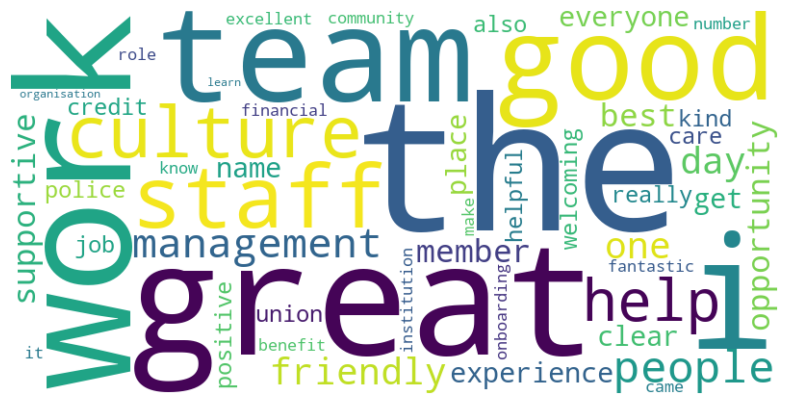

In [7]:
def nuage_de_mots(dico_compte,sauvegarde):
    # Créez un objet WordCloud
    nuage_de_mots = WordCloud(width=800, height=400, background_color='white',max_words=50)

    # Générez le nuage de mots à partir du dictionnaire
    nuage_de_mots.generate_from_frequencies(resultat)

    # Affichez le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(nuage_de_mots, interpolation='bilinear')
    plt.axis('off')

    # Sauvegardez l'image
    plt.savefig(f"{sauvegarde}.jpeg")

    plt.show()

nuage_de_mots(resultat,"nuage_de_mots_avantage_lem")

Sentiment dans un texte

Deux méthodes

In [8]:
nlp_sentiment = spacy.load("emotion_ner_model")

OSError: [E050] Can't find model 'emotion_ner_model'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# Traitez le texte avec spaCy
doc = nlp_sentiment(df_review.lemmas_avantage[0])

# Parcourez les entités nommées dans le texte
entites_emotion = [ent.text for ent in doc.ents if ent.label_ == "EMOTION"]

print("Entités émotionnelles dans le texte :")
for entite in entites_emotion:
    print(entite)

In [11]:
from textblob import TextBlob

def sentiment_predominant(text):

    # Créer un objet TextBlob à partir du texte
    blob = TextBlob(text)

    # Obtenir la polarité du sentiment (-1 pour négatif, 1 pour positif, 0 pour neutre)
    polarite = blob.sentiment.polarity

    # Interprétation de la polarité
    if polarite > 0:
        sentiment = "positif"
    elif polarite < 0:
        sentiment = "négatif"
    else:
        sentiment = "neutre"

    #print(f"Sentiment prédominant : {sentiment} (polarité : {polarite})")

    return (sentiment, polarite)


df_review['sentiment_avantage_lem'] = df_review['lemmas_avantage'].apply(sentiment_predominant)
df_review['sentiment_inconvenient_lem'] = df_review['lemmas_inconvenient'].apply(sentiment_predominant)
df_review

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date,lemmas_avantage,lemmas_inconvenient,stem_avantage,stem_inconvenient,compte_avantage,compte_inconvenient,Review_Concatenation,sentiment_avantage_lem,sentiment_inconvenient_lem
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z,the culture standout the people incredibly mem...,the challenge lie ever-increasing regulatory l...,the cultur standout the peopl incred member fo...,the challeng lie ever-increas regulatori lands...,"{'the': 2, 'culture': 1, 'standout': 1, 'peopl...","{'the': 1, 'challenge': 2, 'lie': 1, 'ever-inc...",the culture standout the people incredibly mem...,"(positif, 0.6666666666666666)","(négatif, -0.25)"
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z,the best part police credit union people absol...,there n't many challenge difficulty always peo...,the best part polic credit union peopl absolut...,there n't mani challeng difficulti alway peopl...,"{'the': 2, 'best': 2, 'part': 1, 'police': 1, ...","{'there': 1, 'n't': 1, 'many': 1, 'challenge':...",the best part police credit union people absol...,"(positif, 0.578956228956229)","(positif, 0.2333333333333333)"
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z,management really care staff the culture great...,no challenge,manag realli care staff the cultur great every...,no challeng,"{'management': 1, 'really': 1, 'care': 1, 'sta...","{'no': 1, 'challenge': 1}",management really care staff the culture great...,"(positif, 0.4375)","(neutre, 0.0)"
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z,fantastic onboarding experience i felt welcome...,i n't faced,fantast onboard experi i felt welcom everyon d...,i n't face,"{'fantastic': 1, 'onboarding': 1, 'experience'...","{'i': 1, 'n't': 1, 'faced': 1}",fantastic onboarding experience i felt welcome...,"(positif, 0.39166666666666666)","(neutre, 0.0)"
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z,fantastic work culture supportive management t...,sale target challenge time,fantast work cultur support manag the opportun...,sale target challeng time,"{'fantastic': 1, 'work': 1, 'culture': 1, 'sup...","{'sale': 1, 'target': 1, 'challenge': 1, 'time...",fantastic work culture supportive management t...,"(positif, 0.4666666666666666)","(neutre, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,"Southern Cross Care (SA, NT & VIC) Inc.",796738,Co-workers are supportive.\nA lovely experienc...,Head office staff disrespect staff working on ...,Allied Health,"South Australia, Australia",1,2021-02-03T22:48:14.000Z,co-worker supportive a lovely experience suppo...,head office staff disrespect staff working gro...,co-work support a love experi support resid,head offic staff disrespect staff work ground ...,"{'co-worker': 1, 'supportive': 1, 'a': 1, 'lov...","{'head': 1, 'office': 1, 'staff': 5, 'disrespe...",co-worker supportive a lovely experience suppo...,"(positif, 0.4166666666666667)","(positif, 0.08357142857142856)"
437,Department of Training and Workforce Developme...,795949,Some flexibility depending on the area you wor...,Middle managers with no experience in managing...,Human Resources Role,Osborne Park WA 6017,3,2023-05-07T01:12:04.000Z,some flexibility depending area work,middle manager experience managing team little...,some flexibl depend area work,middl manag experi ma

Pour chaque entreprise faire une moyenne pour le positif et le negatif. Puis une moyenne de tous les résultats. Comparer avec la moyenne des notes données par les utilisateurs.

In [ ]:
moyenne_positif_entreprises = df_review.groupby('entreprise_id')['sentiment_avantage_lem'].agg(lambda x: sum(v[1] for v in x) / len(x))
moyenne_positif_entreprises
#moyenne_entreprise = df_review.groupby('entreprise_id')['sentiment_avantage_lem'].agg(lambda x: sum(v[1] for v in x) / len(x))

entreprise_id
432298             0.285970
432322             0.371925
432366             0.236583
432368             0.495321
432404             0.144667
432453             0.298222
432455             0.327220
432514             0.307968
432535             0.125833
432558             0.386250
432600             0.437864
432734             0.422806
432761             0.474167
432985             0.469242
433057             0.350833
433224             0.404500
433226             0.518701
433231             0.336402
433278             0.553542
433611             0.286379
433645             0.318155
434032             0.346583
434136             0.351751
435040             0.272121
436321             0.153750
436456             0.544056
436554             0.430240
437279             0.404083
786348             0.351679
795949             0.292187
796738             0.267220
813334             0.425255
813389             0.485568
813475             0.461000
813544             0.339167
813622

In [ ]:
moyenne_negatif_entreprises = df_review.groupby('entreprise_id')['sentiment_inconvenient_lem'].agg(lambda x: sum(v[1] for v in x) / len(x))
moyenne_negatif_entreprises

entreprise_id
432298             0.137442
432322            -0.059621
432366             0.042178
432368            -0.029742
432404            -0.067333
432453            -0.118674
432455            -0.028715
432514             0.123153
432535             0.020603
432558             0.106695
432600             0.111071
432734            -0.078585
432761             0.011606
432985            -0.016405
433057            -0.145916
433224            -0.023333
433226            -0.012033
433231            -0.013083
433278             0.074167
433611            -0.018133
433645             0.076727
434032             0.042604
434136             0.059520
435040             0.011644
436321            -0.056792
436456             0.129888
436554            -0.011903
437279            -0.072649
786348            -0.143000
795949            -0.317187
796738            -0.026115
813334            -0.077121
813389             0.024686
813475             0.106786
813544             0.064340
813622

Comparaison aux notes données

In [17]:
moyenne_notes = df_review.groupby('entreprise_id')['note'].agg(lambda x: sum(v for v in x) / len(x))
moyenne_notes = moyenne_notes.to_frame()
moyenne_notes

,note
entreprise_id,
432298,3.2
432322,2.6
432366,3.3
432368,3.0
432404,2.7
432453,2.7
432455,2.8
432514,2.7
432535,2.1


Concaténer les commentaires négatifs et positifs pour connaitre l'émotion la prédominante.

In [9]:
df_review['Review_Concatenation'] = df_review['lemmas_avantage'] + df_review['lemmas_inconvenient']
df_review

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date,lemmas_avantage,lemmas_inconvenient,stem_avantage,stem_inconvenient,compte_avantage,compte_inconvenient,Review_Concatenation
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z,the culture standout the people incredibly mem...,the challenge lie ever-increasing regulatory l...,the cultur standout the peopl incred member fo...,the challeng lie ever-increas regulatori lands...,"{'the': 2, 'culture': 1, 'standout': 1, 'peopl...","{'the': 1, 'challenge': 2, 'lie': 1, 'ever-inc...",the culture standout the people incredibly mem...
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z,the best part police credit union people absol...,there n't many challenge difficulty always peo...,the best part polic credit union peopl absolut...,there n't mani challeng difficulti alway peopl...,"{'the': 2, 'best': 2, 'part': 1, 'police': 1, ...","{'there': 1, 'n't': 1, 'many': 1, 'challenge':...",the best part police credit union people absol...
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z,management really care staff the culture great...,no challenge,manag realli care staff the cultur great every...,no challeng,"{'management': 1, 'really': 1, 'care': 1, 'sta...","{'no': 1, 'challenge': 1}",management really care staff the culture great...
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z,fantastic onboarding experience i felt welcome...,i n't faced,fantast onboard experi i felt welcom everyon d...,i n't face,"{'fantastic': 1, 'onboarding': 1, 'experience'...","{'i': 1, 'n't': 1, 'faced': 1}",fantastic onboarding experience i felt welcome...
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z,fantastic work culture supportive management t...,sale target challenge time,fantast work cultur support manag the opportun...,sale target challeng time,"{'fantastic': 1, 'work': 1, 'culture': 1, 'sup...","{'sale': 1, 'target': 1, 'challenge': 1, 'time...",fantastic work culture supportive management t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,"Southern Cross Care (SA, NT & VIC) Inc.",796738,Co-workers are supportive.\nA lovely experienc...,Head office staff disrespect staff working on ...,Allied Health,"South Australia, Australia",1,2021-02-03T22:48:14.000Z,co-worker supportive a lovely experience suppo...,head office staff disrespect staff working gro...,co-work support a love experi support resid,head offic staff disrespect staff work ground ...,"{'co-worker': 1, 'supportive': 1, 'a': 1, 'lov...","{'head': 1, 'office': 1, 'staff': 5, 'disrespe...",co-worker supportive a lovely experience suppo...
437,Department of Training and Workforce Developme...,795949,Some flexibility depending on the area you wor...,Middle managers with no experience in managing...,Human Resources Role,Osborne Park WA 6017,3,2023-05-07T01:12:04.000Z,some flexibility depending area work,middle manager experience managing team little...,some flexibl depend area work,middl manag experi manag team littl aptitud ma...,"{'some': 1, 'flexibility': 1, 'depending': 1, ...","{'middle': 1, 'manager': 2, 'experience': 1, '...",some flexibility depending area workmiddle man...
438,Department of Training and Workforce Developme...,795949,"Casual atmosphere, good flexi, no micro manage...",A lot of mismanagement and fighting between te...,Information Technology S

In [21]:
df_review['sentiment_review'] = df_review['Review_Concatenation'].apply(sentiment_predominant)
moyenne_entreprises = df_review.groupby('entreprise_id')['sentiment_review'].agg(lambda x: sum(v[1] for v in x) / len(x))
notes_echelle_1_converties = [round((note + 1) * 2.5,1) for note in moyenne_entreprises]
notes_echelle_1_converties

[3.0,
 2.9,
 3.0,
 3.2,
 2.3,
 2.8,
 2.7,
 3.0,
 2.5,
 3.2,
 3.3,
 3.0,
 3.1,
 3.2,
 3.0,
 3.2,
 3.5,
 3.1,
 3.5,
 2.7,
 3.0,
 3.1,
 3.1,
 2.8,
 2.4,
 3.6,
 3.4,
 3.0,
 2.9,
 2.6,
 2.8,
 3.0,
 3.2,
 3.6,
 3.0,
 2.9,
 3.4,
 2.9,
 3.4,
 3.2]

In [22]:
moyenne_notes['Note_calcule'] = notes_echelle_1_converties
moyenne_notes

,note,Note_calcule
entreprise_id,,
432298,3.2,3.0
432322,2.6,2.9
432366,3.3,3.0
432368,3.0,3.2
432404,2.7,2.3
432453,2.7,2.8
432455,2.8,2.7
432514,2.7,3.0
432535,2.1,2.5


Comparaison des résultats

In [25]:
# Ajoutez une colonne "Comparaison" pour stocker le résultat de la comparaison
moyenne_notes['Comparaison'] = None  # Initialisez la colonne avec des valeurs nulles

# Comparez les deux colonnes et remplissez la colonne "Comparaison" avec les résultats
moyenne_notes.loc[moyenne_notes['note'] > moyenne_notes['Note_calcule'], 'Comparaison'] = 'Plus petit'
moyenne_notes.loc[moyenne_notes['note'] < moyenne_notes['Note_calcule'], 'Comparaison'] = 'Plus grand'
moyenne_notes.loc[moyenne_notes['note'] == moyenne_notes['Note_calcule'], 'Comparaison'] = 'Égal'
moyenne_notes

,note,Note_calcule,Comparaison
entreprise_id,,,
432298,3.2,3.0,Plus petit
432322,2.6,2.9,Plus grand
432366,3.3,3.0,Plus petit
432368,3.0,3.2,Plus grand
432404,2.7,2.3,Plus petit
432453,2.7,2.8,Plus grand
432455,2.8,2.7,Plus petit
432514,2.7,3.0,Plus grand
432535,2.1,2.5,Plus grand
